In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up Seaborn
sns.set()

In [2]:
df = pd.read_csv("data_clean_2.csv")

In [3]:
names = {"Sanju Adhikari" : "her", "Regmi C. Mahesh" : "me"}

In [4]:
df.sender_name = df.sender_name.map(names)

In [5]:
df.sender_name = df.sender_name.astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370 entries, 0 to 3369
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sender_name  3370 non-null   category
 1   content      3370 non-null   object  
dtypes: category(1), object(1)
memory usage: 29.8+ KB


In [7]:
df['length'] = df.content.str.len()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370 entries, 0 to 3369
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sender_name  3370 non-null   category
 1   content      3370 non-null   object  
 2   length       3370 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 56.2+ KB


In [9]:
df.head()

,sender_name,content,length
0,her,Har na reply nagarakk,21
1,me,Hajur,5
2,her,Kaa xau,7
3,me,Aaja mobile dai le bokya xa ni ta,33
4,me,Class ma xau,12


In [10]:
df["cum_sum"] =df.groupby("sender_name").cumsum()

In [11]:
df

,sender_name,content,length,cum_sum
0,her,Har na reply nagarakk,21,21
1,me,Hajur,5,5
2,her,Kaa xau,7,28
3,me,Aaja mobile dai le bokya xa ni ta,33,38
4,me,Class ma xau,12,50
...,...,...,...,...
3365,her,K ess ne,8,23875
3366,her,Ho tw,5,23880
3367,her,I am lucky for you,18,23898
3368,me,Kaile bhetni,12,13865


In [12]:
df.tail()

,sender_name,content,length,cum_sum
3365,her,K ess ne,8,23875
3366,her,Ho tw,5,23880
3367,her,I am lucky for you,18,23898
3368,me,Kaile bhetni,12,13865
3369,her,Jaila ne sangai basne k,23,23921


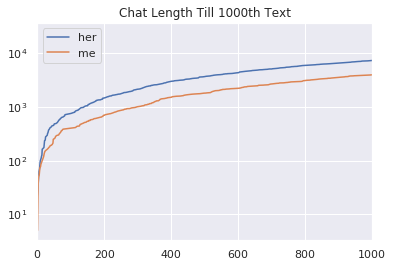

In [13]:
df.groupby("sender_name")["cum_sum"].plot()

plt.xlim(0,1000)
plt.legend()

plt.yscale("log")
plt.title("Chat Length Till 1000th Text")
plt.savefig("chat-length-till-100.png", dpi=300)
plt.show()

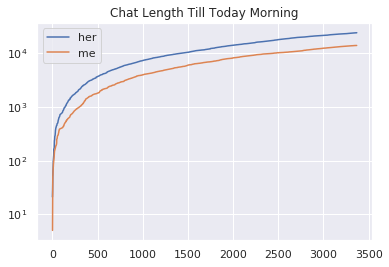

In [14]:
df.groupby("sender_name")["cum_sum"].plot()
plt.legend()

plt.yscale("log")
plt.title("Chat Length Till Today Morning")
plt.savefig("chat-length-complete.png", dpi=300)
plt.show()

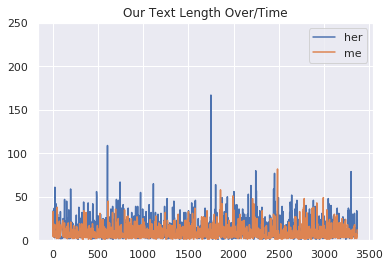

In [15]:
df.groupby("sender_name")["length"].plot()

plt.title("Our Text Length Over/Time")
plt.ylim(0,250)
plt.legend()
plt.savefig("chat-length-over-time.png", dpi=300)
plt.show()



In [16]:
from scipy.stats import norm

In [17]:
appr_column = df[df["length"] < 100]["length"]

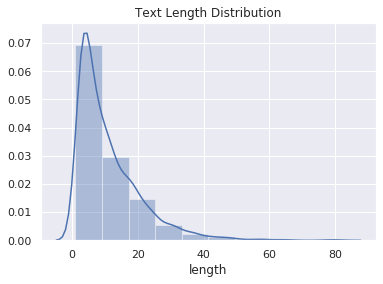

In [18]:
sns.distplot(appr_column, bins = 10)
plt.savefig("chat-length-ditribution.png", dpi=300)
plt.title("Text Length Distribution")
plt.show()

In [19]:
df.head()

,sender_name,content,length,cum_sum
0,her,Har na reply nagarakk,21,21
1,me,Hajur,5,5
2,her,Kaa xau,7,28
3,me,Aaja mobile dai le bokya xa ni ta,33,38
4,me,Class ma xau,12,50


In [20]:
df.groupby("sender_name").count()

,content,length,cum_sum
sender_name,,,
her,1872,1872,1872
me,1498,1498,1498


In [21]:
print(*(list(df[df["length"] > 100]['content'])) , sep = "\n")

Hejo k taila clz top garesh vane taila ja vano tei talai vanako thee maila Lai
Aaza result top nai garerako k
I know for the true lovers every day is valentines day
But also
Happy valentines day my love
Love you soo much
N I will be there wid u in ur gud n bad tym
Lots of love


In [27]:
df["content"].str.match(r"b").sum()

86

In [ ]:
df

In [28]:
df[df["content"].str.match(r"vetn")]["content"]

Series([], Name: content, dtype: object)

I lose :(